<a href="https://colab.research.google.com/github/LishaRudani/HPV_Infections_In_Women_EDA/blob/main/Chlamydia_trachomatis_and_human_papillomavirus_(HPV)_infections_in_women_with_cervical_adenocarcinoma_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [ ]:
infection_data=pd.read_csv('/content/drive/MyDrive/HPV_dataset/infection.csv')

In [ ]:
infection_data.head()

,SubjectID,RisksetID,CaseStatus,AgeAtDiag,HPVpos,CTpos,AgeAtSmear,MatchFirst,MatchLast,RecNr
0,1,1,0,59.90,0,0,55.18,1,0,63
1,1,1,0,59.90,0,0,59.31,0,1,64
2,2,1,1,59.58,1,0,54.89,1,0,65
3,2,1,1,59.58,1,0,59.40,0,1,66
4,5,2,0,57.78,1,0,49.11,1,0,77


In [ ]:
infection_data.tail()

,SubjectID,RisksetID,CaseStatus,AgeAtDiag,HPVpos,CTpos,AgeAtSmear,MatchFirst,MatchLast,RecNr
752,242,132,1,28.99,1,0,28.08,0,1,715
753,254,133,0,24.41,1,0,17.40,1,1,757
754,256,133,1,24.19,1,0,17.29,1,0,716
755,256,133,1,24.19,1,0,18.91,0,0,717
756,256,133,1,24.19,1,0,19.49,0,1,718


In [ ]:
infection_data.shape

(757, 10)

In [ ]:
infection_data.columns

Index(['SubjectID', 'RisksetID', 'CaseStatus', 'AgeAtDiag', 'HPVpos', 'CTpos',
       'AgeAtSmear', 'MatchFirst', 'MatchLast', 'RecNr'],
      dtype='object')

In [ ]:
infection_data.columns

Index(['SubjectID', 'RisksetID', 'CaseStatus', 'AgeAtDiag', 'HPVpos', 'CTpos',
       'AgeAtSmear', 'MatchFirst', 'MatchLast', 'RecNr'],
      dtype='object')

In [ ]:
infection_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SubjectID   757 non-null    int64  
 1   RisksetID   757 non-null    int64  
 2   CaseStatus  757 non-null    int64  
 3   AgeAtDiag   757 non-null    float64
 4   HPVpos      757 non-null    int64  
 5   CTpos       757 non-null    int64  
 6   AgeAtSmear  757 non-null    float64
 7   MatchFirst  757 non-null    int64  
 8   MatchLast   757 non-null    int64  
 9   RecNr       757 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 59.3 KB


In [ ]:
infection_data.describe()

,SubjectID,RisksetID,CaseStatus,AgeAtDiag,HPVpos,CTpos,AgeAtSmear,MatchFirst,MatchLast,RecNr
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,122.023778,62.458388,0.561427,39.047503,0.549538,0.022457,33.593144,0.338177,0.338177,379.000000
std,74.482958,38.122296,0.496540,9.329715,0.497869,0.148263,9.805491,0.473402,0.473402,218.671367
min,1.000000,1.000000,0.000000,19.780000,0.000000,0.000000,16.200000,0.000000,0.000000,1.000000
25%,58.000000,31.000000,0.000000,32.110000,0.000000,0.000000,26.390000,0.000000,0.000000,190.000000
50%,118.000000,58.000000,1.000000,37.510000,1.000000,0.000000,32.200000,0.000000,0.000000,379.000000
75%,186.000000,95.000000,1.000000,44.310000,1.000000,0.000000,39.690000,1.000000,1.000000,568.000000
max,261.000000,133.000000,1.000000,75.190000,1.000000,1.000000,72.210000,1.000000,1.000000,757.000000


In [ ]:
infection_data.isnull().sum()

SubjectID     0
RisksetID     0
CaseStatus    0
AgeAtDiag     0
HPVpos        0
CTpos         0
AgeAtSmear    0
MatchFirst    0
MatchLast     0
RecNr         0
dtype: int64

In [ ]:
infection_data.nunique()


SubjectID     261
RisksetID     133
CaseStatus      2
AgeAtDiag     238
HPVpos          2
CTpos           2
AgeAtSmear    591
MatchFirst      2
MatchLast       2
RecNr         757
dtype: int64

In [ ]:
infection_data['CaseStatus'].unique()

array([0, 1])

In [ ]:
infection_data['CaseStatus'].value_counts()

1    425
0    332
Name: CaseStatus, dtype: int64

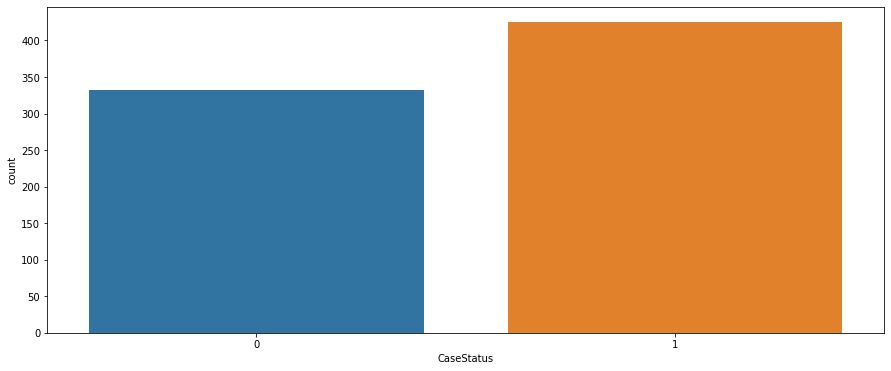

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('CaseStatus', data = infection_data)
plt.xticks(rotation = 0)
plt.show()

In [ ]:
infection_data['HPVpos'].unique()

array([0, 1])

In [ ]:
infection_data['HPVpos'].value_counts()

1    416
0    341
Name: HPVpos, dtype: int64

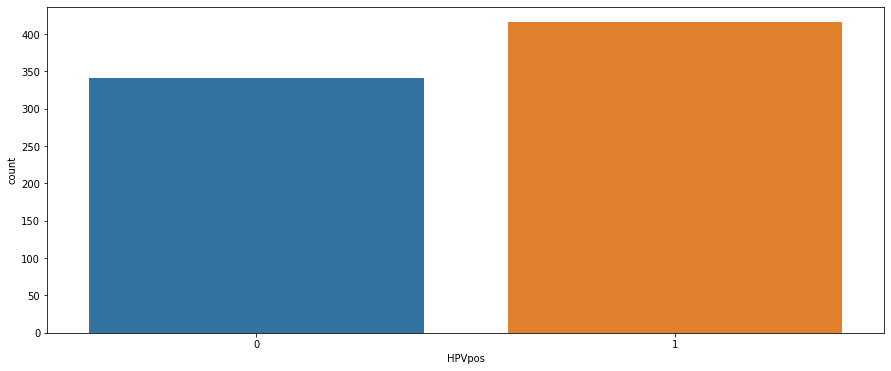

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('HPVpos', data = infection_data)
plt.xticks(rotation = 0)
plt.show()


In [ ]:
infection_data['CTpos'].unique()


array([0, 1])

In [ ]:
infection_data['CTpos'].value_counts()

0    740
1     17
Name: CTpos, dtype: int64

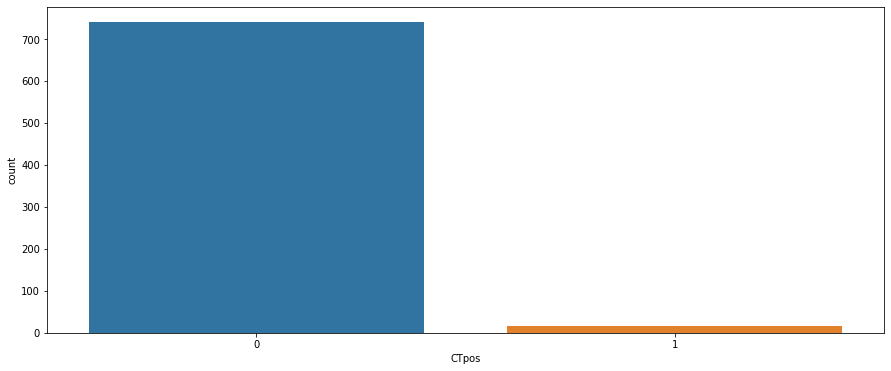

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('CTpos', data = infection_data)
plt.xticks(rotation = 0)
plt.show()


In [ ]:
infection_data['MatchFirst'].unique()


array([1, 0])

In [ ]:
infection_data['MatchFirst'].value_counts()

0    501
1    256
Name: MatchFirst, dtype: int64

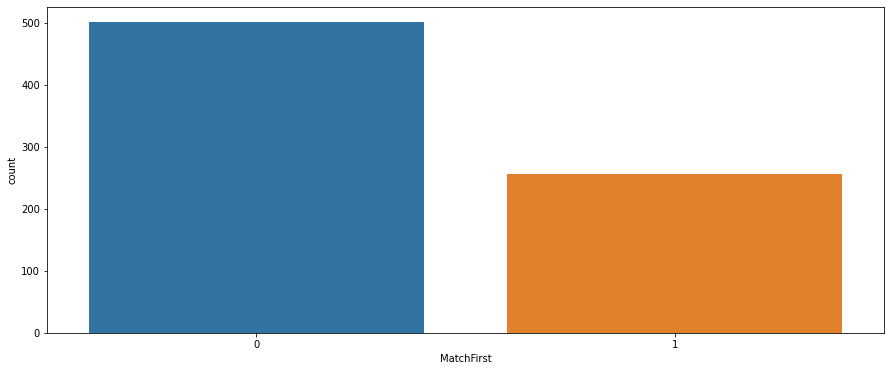

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('MatchFirst', data = infection_data)
plt.xticks(rotation = 0)
plt.show()


In [ ]:
infection_data['MatchLast'].unique()

array([0, 1])

In [ ]:
infection_data['MatchLast'].value_counts()

0    501
1    256
Name: MatchLast, dtype: int64

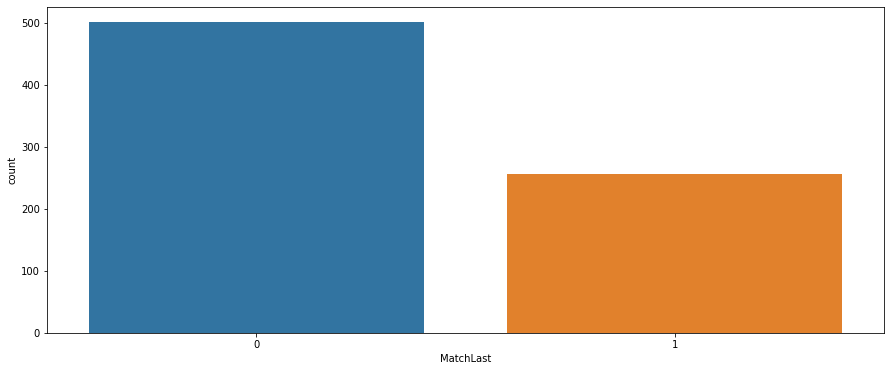

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('MatchLast', data = infection_data)
plt.xticks(rotation = 0)
plt.show()

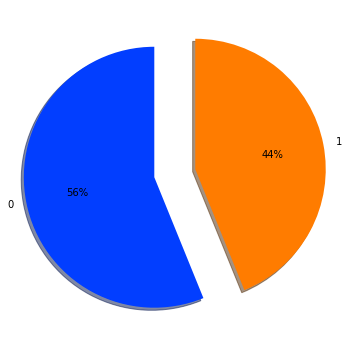

In [ ]:
plt.figure(figsize=(15,6))
explode = [0.3,0.02]
colors = sns.color_palette('bright')
plt.pie(infection_data['CaseStatus'].value_counts(), labels=[0, 1],
colors = colors, autopct = '%0.0f%%', explode = explode, shadow = 'True',
startangle = 90)
plt.show()

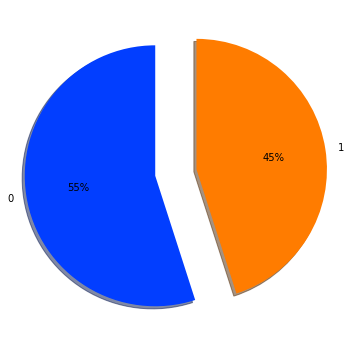

In [ ]:
plt.figure(figsize=(15,6))
explode = [0.3,0.02]
colors = sns.color_palette('bright')
plt.pie(infection_data['HPVpos'].value_counts(), labels=[0, 1],
colors = colors, autopct = '%0.0f%%', explode = explode, shadow = 'True',
startangle = 90)
plt.show()

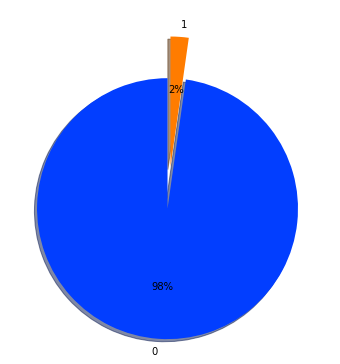

In [ ]:
plt.figure(figsize=(15,6))
explode = [0.3,0.02]
colors = sns.color_palette('bright')
plt.pie(infection_data['CTpos'].value_counts(), labels=[0, 1],
colors = colors, autopct = '%0.0f%%', explode = explode, shadow = 'True',
startangle = 90)
plt.show()

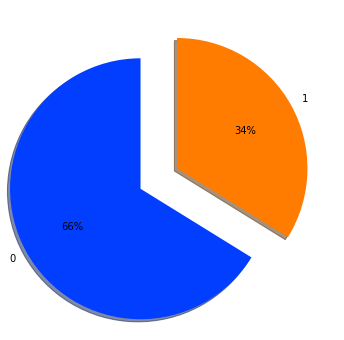

In [ ]:
plt.figure(figsize=(15,6))
explode = [0.3,0.02]
colors = sns.color_palette('bright')
plt.pie(infection_data['MatchFirst'].value_counts(), labels=[0, 1],
colors = colors, autopct = '%0.0f%%', explode = explode, shadow = 'True',
startangle = 90)
plt.show()

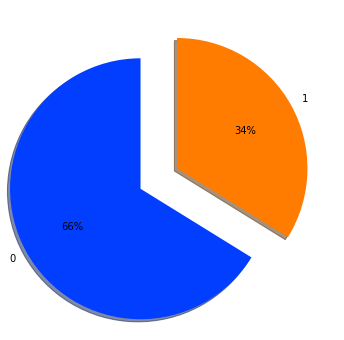

In [ ]:
plt.figure(figsize=(15,6))
explode = [0.3,0.02]
colors = sns.color_palette('bright')
plt.pie(infection_data['MatchLast'].value_counts(), labels=[0, 1],
colors = colors, autopct = '%0.0f%%', explode = explode, shadow = 'True',
startangle = 90)
plt.show()

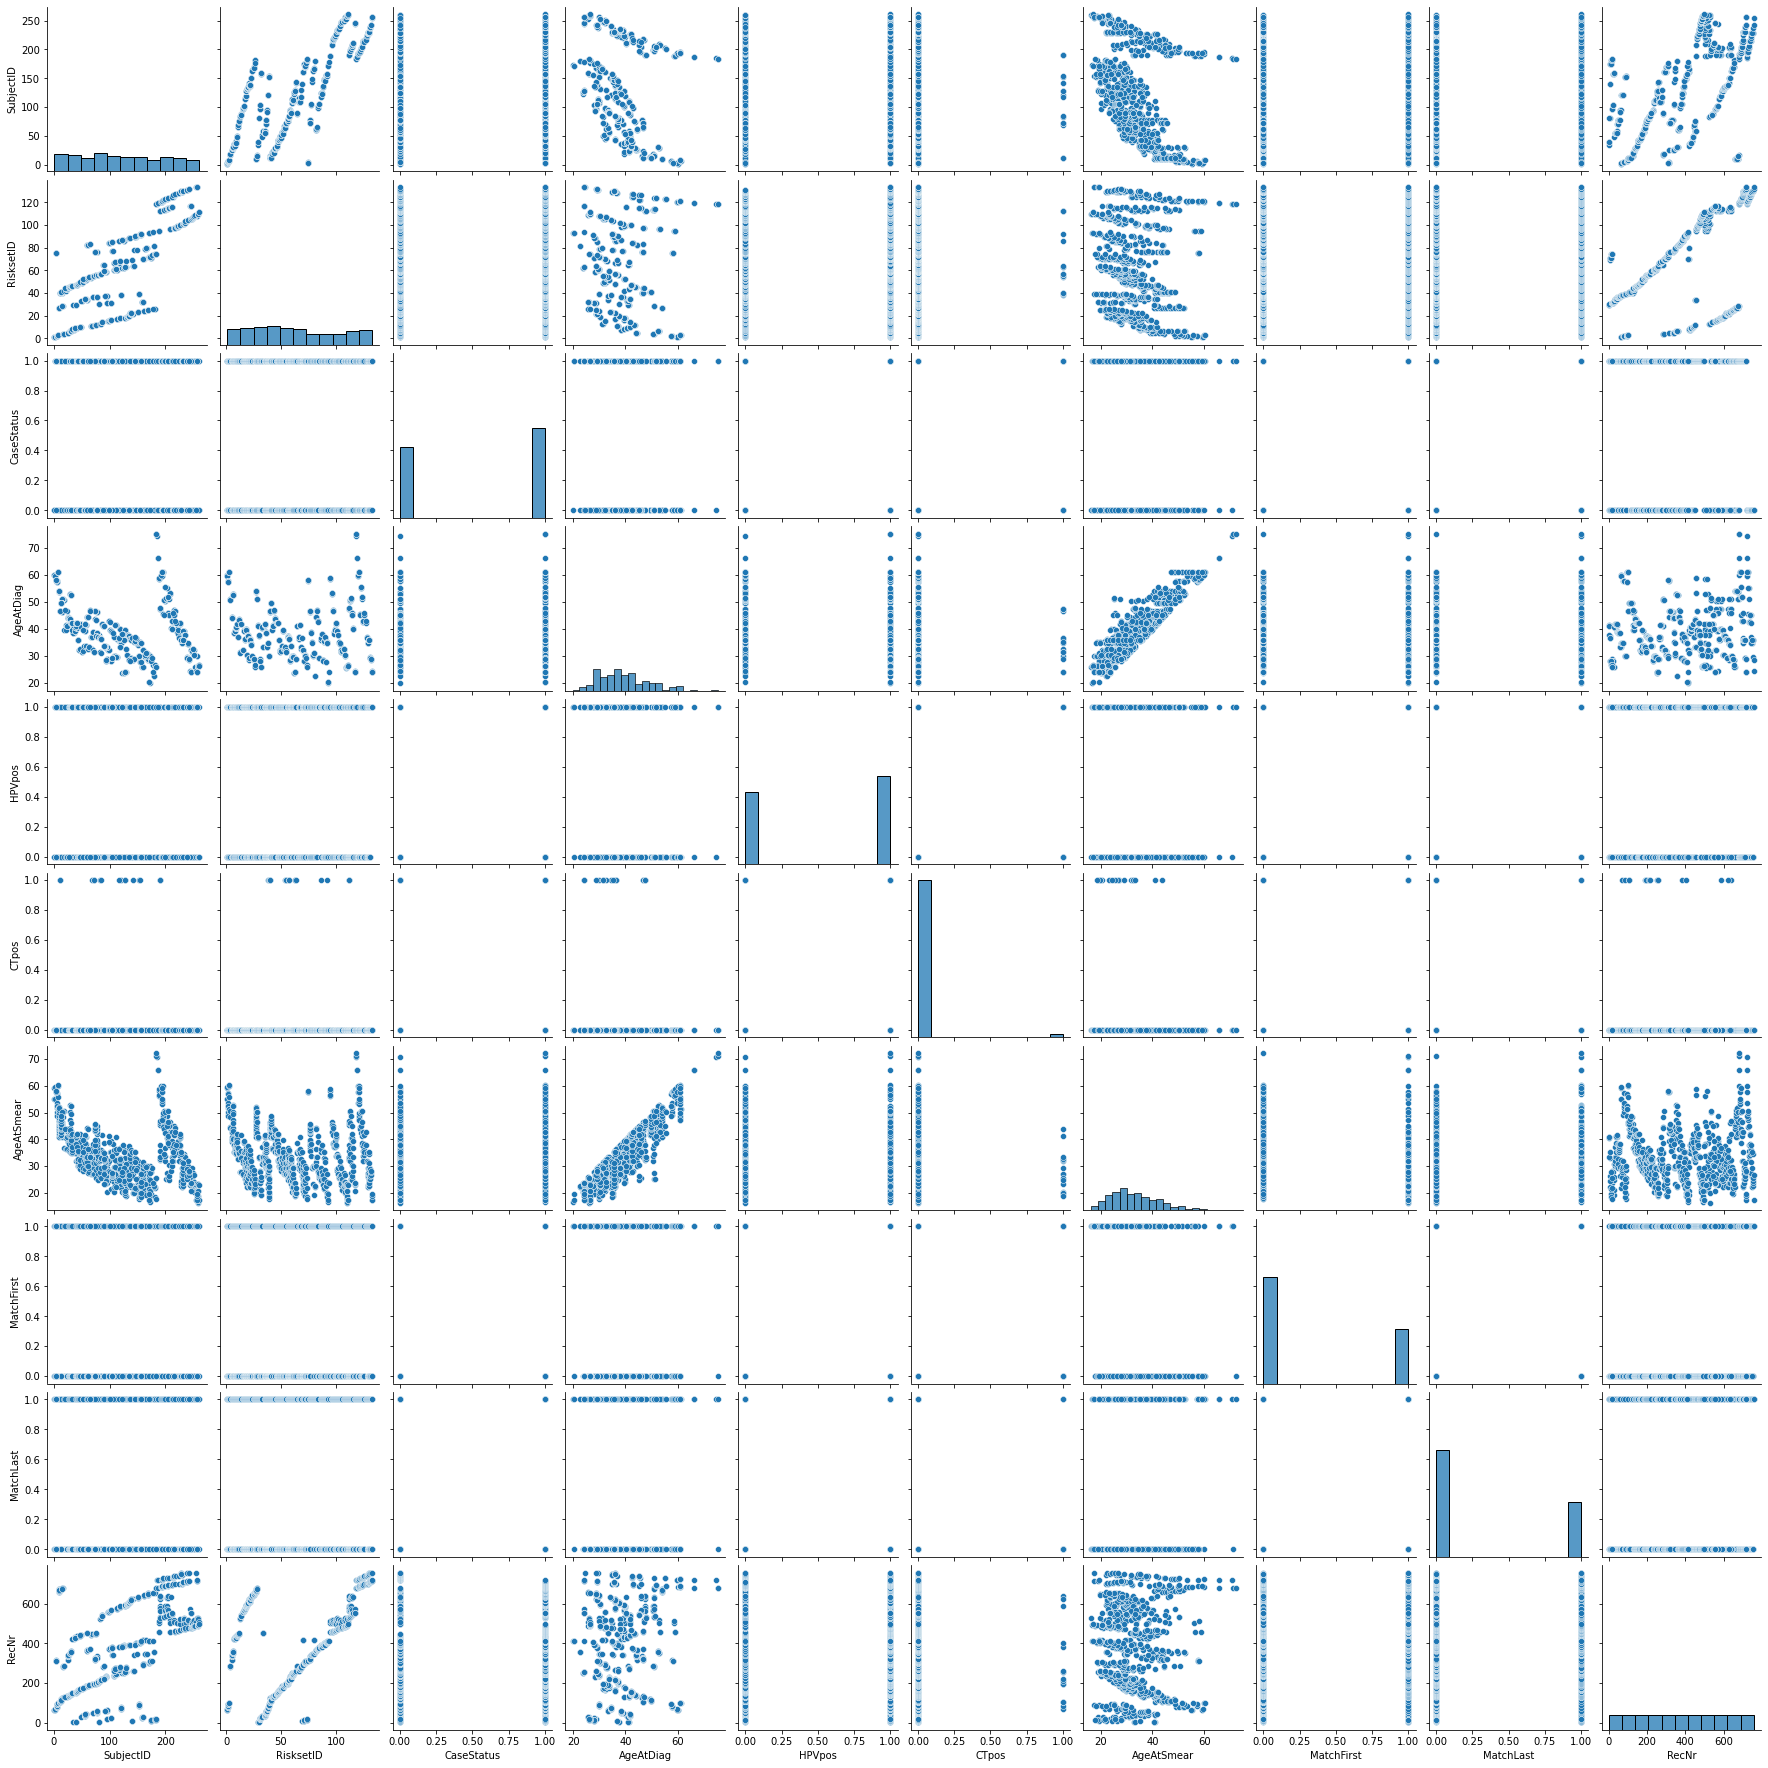

In [ ]:
sns.pairplot(infection_data)

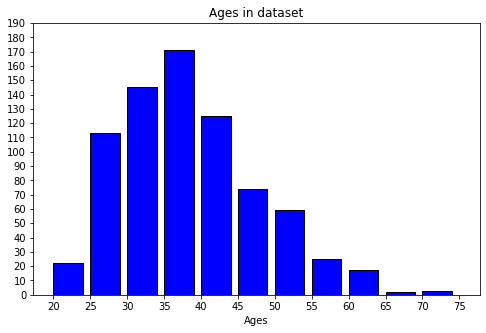

In [ ]:
bins = list(range(20,80,5))
plt.figure(figsize = (8,5))
plt.hist(infection_data['AgeAtDiag'].astype(int), width = 4, align = 'mid',
bins = bins, color = 'blue', edgecolor = 'black')
plt.xticks(bins)
plt.xlabel('Ages')
plt.title('Ages in dataset')
plt.yticks(np.arange(0,200,10))
plt.show()

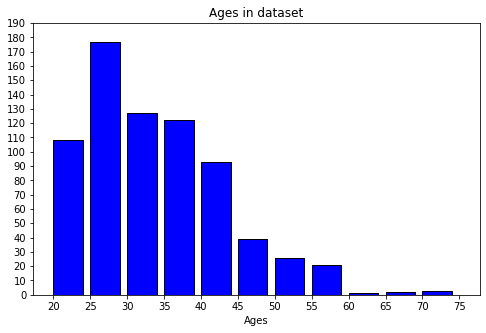

In [ ]:
bins = list(range(20,80,5))
plt.figure(figsize = (8,5))
plt.hist(infection_data['AgeAtSmear'].astype(int), width = 4, align = 'mid',
bins = bins, color = 'blue', edgecolor = 'black')
plt.xticks(bins)
plt.xlabel('Ages')
plt.title('Ages in dataset')
plt.yticks(np.arange(0,200,10))
plt.show()


In [ ]:
category=pd.cut(infection_data['AgeAtDiag'], bins= list(range(20,80,5)))

In [ ]:
infection_data.insert(5,'Age_Group',category)

In [ ]:
infection_data.head()

,SubjectID,RisksetID,CaseStatus,AgeAtDiag,HPVpos,Age_Group,CTpos,AgeAtSmear,MatchFirst,MatchLast,RecNr
0,1,1,0,59.90,0,"(55, 60]",0,55.18,1,0,63
1,1,1,0,59.90,0,"(55, 60]",0,59.31,0,1,64
2,2,1,1,59.58,1,"(55, 60]",0,54.89,1,0,65
3,2,1,1,59.58,1,"(55, 60]",0,59.40,0,1,66
4,5,2,0,57.78,1,"(55, 60]",0,49.11,1,0,77


In [ ]:
infection_data['Age_Group'].unique()

[(55, 60], (60, 65], (50, 55], (40, 45], (35, 40], ..., (45.0, 50.0], (20.0, 25.0], NaN, (70.0, 75.0], (65.0, 70.0]]
Length: 12
Categories (11, interval[int64, right]): [(20, 25] < (25, 30] < (30, 35] < (35, 40] ... (55, 60] <
                                          (60, 65] < (65, 70] < (70, 75]]

In [ ]:
infection_data['Age_Group'].value_counts()

(35, 40]    171
(30, 35]    145
(40, 45]    125
(25, 30]    113
(45, 50]     74
(50, 55]     59
(55, 60]     25
(20, 25]     22
(60, 65]     17
(65, 70]      2
(70, 75]      1
Name: Age_Group, dtype: int64

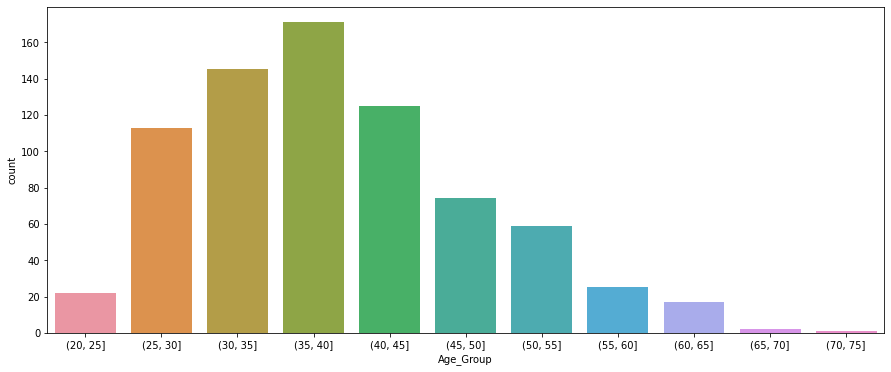

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('Age_Group', data = infection_data)
plt.xticks(rotation = 0)
plt.show()

In [ ]:
category1=pd.cut(infection_data['AgeAtSmear'], bins= list(range(20,80,5)))

In [ ]:
infection_data.insert(5,'Age_Group_New',category1)

In [ ]:
infection_data.head()

,SubjectID,RisksetID,CaseStatus,AgeAtDiag,HPVpos,Age_Group_New,Age_Group,CTpos,AgeAtSmear,MatchFirst,MatchLast,RecNr
0,1,1,0,59.90,0,"(55, 60]","(55, 60]",0,55.18,1,0,63
1,1,1,0,59.90,0,"(55, 60]","(55, 60]",0,59.31,0,1,64
2,2,1,1,59.58,1,"(50, 55]","(55, 60]",0,54.89,1,0,65
3,2,1,1,59.58,1,"(55, 60]","(55, 60]",0,59.40,0,1,66
4,5,2,0,57.78,1,"(45, 50]","(55, 60]",0,49.11,1,0,77


In [ ]:
infection_data['Age_Group_New'].unique()

[(55, 60], (50, 55], (45, 50], (60, 65], (40, 45], ..., (25.0, 30.0], (20.0, 25.0], NaN, (70.0, 75.0], (65.0, 70.0]]
Length: 12
Categories (11, interval[int64, right]): [(20, 25] < (25, 30] < (30, 35] < (35, 40] ... (55, 60] <
                                          (60, 65] < (65, 70] < (70, 75]]

In [ ]:
infection_data['Age_Group_New'].value_counts()

(25, 30]    176
(30, 35]    129
(35, 40]    122
(20, 25]    109
(40, 45]     92
(45, 50]     38
(50, 55]     26
(55, 60]     21
(70, 75]      3
(65, 70]      2
(60, 65]      1
Name: Age_Group_New, dtype: int64

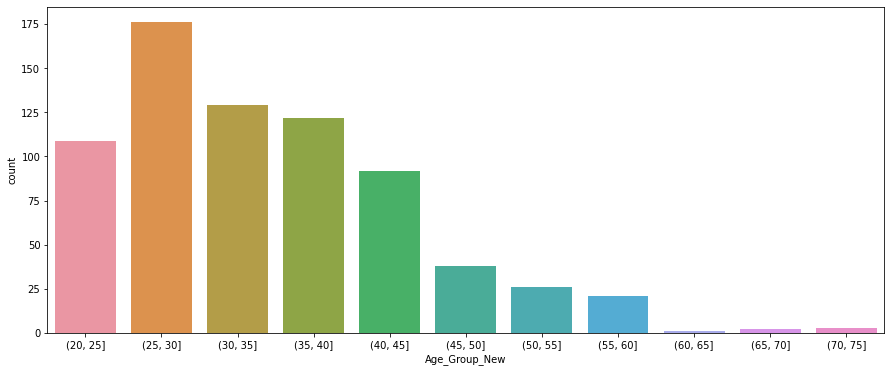

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('Age_Group_New', data = infection_data)
plt.xticks(rotation = 0)
plt.show()

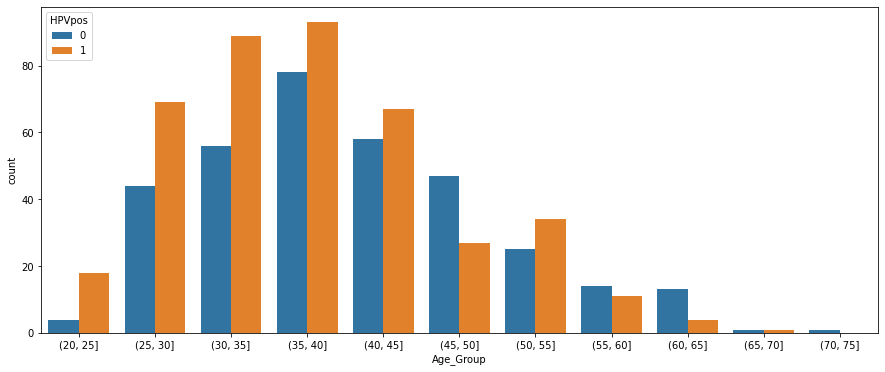

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Age_Group', hue = 'HPVpos', data = infection_data)
plt.xticks(rotation = 0)
plt.show()

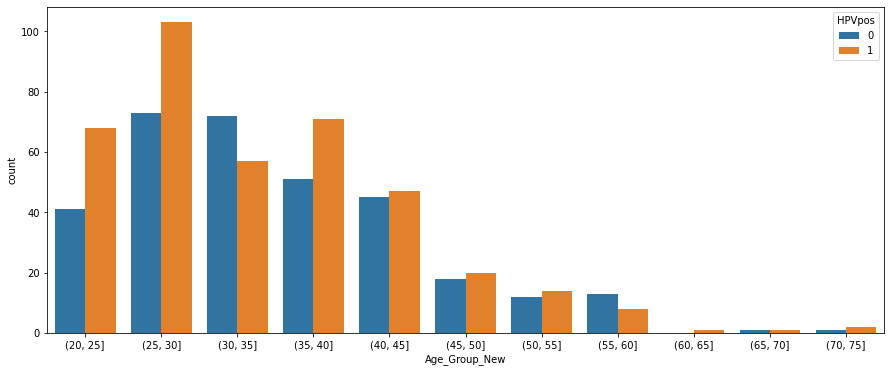

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Age_Group_New', hue = 'HPVpos', data = infection_data)
plt.xticks(rotation = 0)
plt.show()

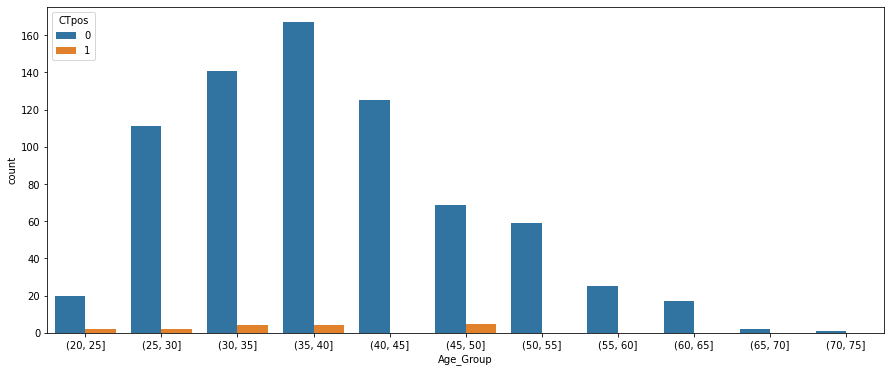

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Age_Group', hue = 'CTpos', data = infection_data)
plt.xticks(rotation = 0)
plt.show()

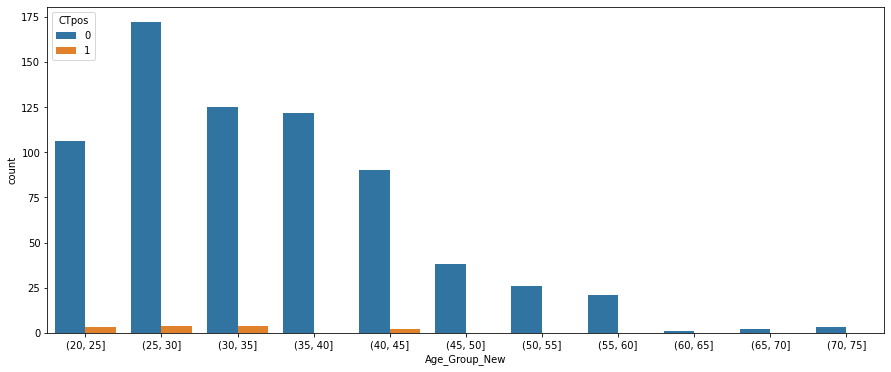

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Age_Group_New', hue = 'CTpos', data = infection_data)
plt.xticks(rotation = 0)
plt.show()

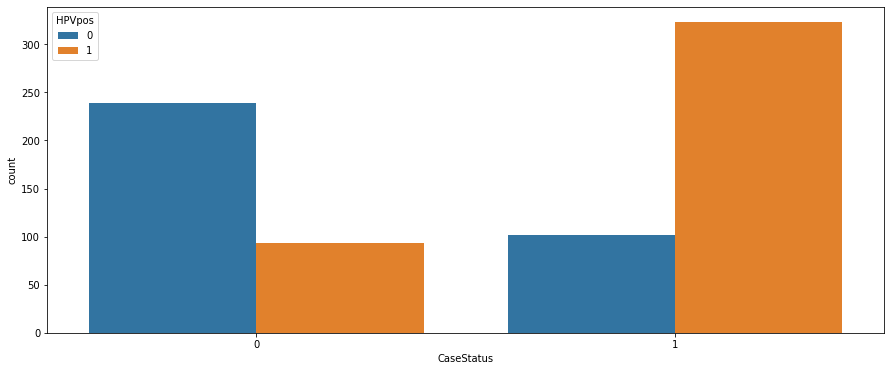

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'CaseStatus', hue = 'HPVpos', data = infection_data)
plt.xticks(rotation = 0)
plt.show()

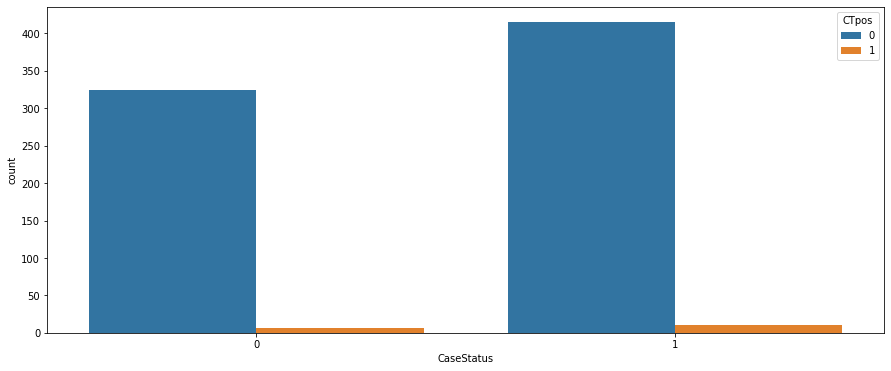

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'CaseStatus', hue = 'CTpos', data = infection_data)
plt.xticks(rotation = 0)
plt.show()